In [11]:
import blaze
import pandas as pd
import numpy as np

/Users/houghton/anaconda/lib/python2.7/site-packages/flask/exthook.py:71: ExtDeprecationWarning: Importing flask.ext.cors is deprecated, use flask_cors instead.
  .format(x=modname), ExtDeprecationWarning


In [12]:
np.random.randint(1,10)

8

In [6]:
import json
from itertools import combinations
import itertools
import re
from nltk.tokenize import RegexpTokenizer
import dateutil.parser

from collections import Counter


from nltk.corpus import stopwords
tw_stopwords = stopwords.words() + ['rt', '@']


def get_word_cooccurrences(json_message):
    """
    Identifies word combinations in a single message.
    Drops stopwords and punctuation.

    Parameters
    ----------
    json_message: basestring
        a single line from a raw twitter json file

    Returns
    -------
    sets: list of tuples
        each tuple contains the date and two words (in alphabetical order) of a pair

    """
    try:
        parsed_json = json.loads(json_message)
        text = parsed_json['text'].lower()

    except KeyError:  # There is no 'Text' in json body
        return []

    # remove hyperlinks
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

    # tokenize, dropping punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    #tokens = [token.encode('utf8') for token in tokens] #ascii encode

    # drop stopwords
    tokens = filter(lambda x: x not in tw_stopwords, tokens)

    date = dateutil.parser.parse(parsed_json['created_at']).strftime("%Y%m%d")

    sets = [tuple([date] + sorted(pair)) for pair in combinations(tokens, 2)]

    return sets

In [7]:
import dask.bag as db
import json

#tw_file = 'tests/posts_sample_20160101_100206_fz.txt.gz'
tw_file = 'tests/resources/testfile_1000.txt.gz'

results = db.read_text(tw_file).map(get_word_cooccurrences).concat()
frequencies = results.frequencies()
dicts = frequencies.map(lambda x: {'Date':x[0][0], 'W1':x[0][1], 'W2':x[0][2], 'Count':x[1]})
df = dicts.to_dataframe()

In [4]:
import dask

In [5]:
a = dask.dataframe.DataFrame

TypeError: 'module' object is not callable

In [8]:
df.head()

,Count,Date,W1,W2
0,1,20160104,اص,امة
1,1,20160104,brazo,veo
2,1,20160104,let,take
3,1,20160104,사라,텐가
4,1,20160104,activity,color


In [13]:
a = df[['W1', 'W2', 'Count']].head(1000)

In [22]:
import os

In [24]:
a['Count'] = a['W1'].apply(lambda x: np.random.randint(1,10))

In [25]:
a.head()

,W1,W2,Count
0,اص,امة,3
1,brazo,veo,7
2,let,take,5
3,사라,텐가,3
4,activity,color,4


In [ ]:
pd.read_csv()

In [26]:
a.to_csv('weighted_edgelist_sample_*.txt', sep=' ', index=False, header=False, encoding='utf-8')

In [ ]:
def vary_thresholds(df):
    for threshold in range(df['Count'].max()+1)
        selected = df[df['Count'] >= threshold]
        find_cliques(selected[['W1', 'W2']])

In [13]:
for i in range(df['Count'].max())
    df[df['Count']>5][['W1', 'W2']].values

array([[u'\u0643', u'\u0645'],
       [u'new', u'year'],
       [u'get', u'university'],
       [u'parle', u'\xe7a'],
       [u'\u0633', u'\u0643']], dtype=object)

In [9]:
frequencies.count().compute()

2095327

In [16]:
import dask

In [20]:
b = dask.dataframe.csv.read_csv('tests/unweighted_edgelist_sample.txt', sep = ' ')

In [21]:
b.head()

,irán,naciones
0,kokoa_love_gene,らめっ
1,brazo,veo
2,let,take
3,activity,color
4,dhishkiyaon,seharsaleem007


In [20]:
th10 = frequencies.filter(lambda x: x[1]>3)

In [16]:
th10.compute()

[(('20160104', u'\u0627\u0644\u0622\u0646', u'\u064a\u062c\u062f'), 43),
 (('20160104', u'\u0627\u0631', u'\u0645'), 14),
 (('20160104', u'\ubb34\ub8cc\uc57c\ub3d9', u'\uc5ec\uc6b0\uc57c'), 17),
 (('20160104', u'eurusd', u'pips'), 20),
 (('20160104',
   u'\u0627\u0644\u062f\u0628\u0644\u0648\u0645\u0627\u0633\u064a\u0629',
   u'\u0645\u0639'),
  27),
 (('20160104', u'allocation', u'plants'), 12),
 (('20160104', u'\u0642\u0628\u0644', u'\u0648'), 21),
 (('20160104', u'amp', u'free'), 40),
 (('20160104', u'sign', u'snapcode'), 12),
 (('20160104', u'get', u'twitter'), 22),
 (('20160104', u'new', u'win'), 35),
 (('20160104', u'\u0642\u0627\u0644', u'\u0648\u0644\u0627'), 25),
 (('20160104', u'city', u'giggs'), 15),
 (('20160104', u'\u524d\u65e5\u6bd4', u'\u6674\u306e\u3061\u66c7'), 17),
 (('20160104', u'back', u'hope'), 13),
 (('20160104', u'amp', u'ciara'), 28),
 (('20160104', u'\u0646', u'\u0646'), 251),
 (('20160104', u'\ub053', u'\uc624'), 18),
 (('20160104', u'case', u'giveaway'), 22)

In [21]:
th10.count().compute()

78426

In [22]:
groups = th10.groupby(lambda x: x[0][0])

In [23]:
groups.count().compute()

1

In [27]:
def groupformat(x):
    return x.map(lambda x: x[0][1:2])

In [30]:
th10.map(lambda x: x[0][1:3]).take(3)

((u'\ubc95',), (u'\u0627\u0648\u0644',), (u'\u0627\u0644\u0622\u0646',))

In [28]:
groups.map(groupformat).take(1).take(3)

AttributeError: 'tuple' object has no attribute 'map'

Traceback
---------
  File "/Users/houghton/anaconda/lib/python2.7/site-packages/dask/async.py", line 263, in execute_task
    result = _execute_task(task, data)
  File "/Users/houghton/anaconda/lib/python2.7/site-packages/dask/async.py", line 245, in _execute_task
    return func(*args2)
  File "/Users/houghton/anaconda/lib/python2.7/site-packages/dask/bag/core.py", line 1667, in safe_take
    r = list(take(n, b))
  File "<ipython-input-27-f7f65b343777>", line 2, in groupformat
    x.map(lambda x: x[0][1:2])


In [1]:
import dask.dataframe as dd
from homer.clusterer import traverse_thresholds
w_el = dd.read_csv('tests/resources/weighted_edgelist_sample.txt',
                   sep=' ', names=['W1', 'W2', 'Count'])
clusters = traverse_thresholds(w_el)


In [2]:
clusters.compute()

,Set,k,threshold
0,"{music, pro, black}",3,3
1,"{ار, ء, ناء}",3,3
0,"{ار, ء, ناء}",3,5
0,"{ار, ء, ناء}",3,4
0,"{living, joint, vicariously}",3,1
1,"{ار, ء, ناء}",3,1
2,"{new, 38, uk}",3,1
3,"{music, pro, black}",3,1
0,"{music, pro, black}",3,2
1,"{ار, ء, ناء}",3,2


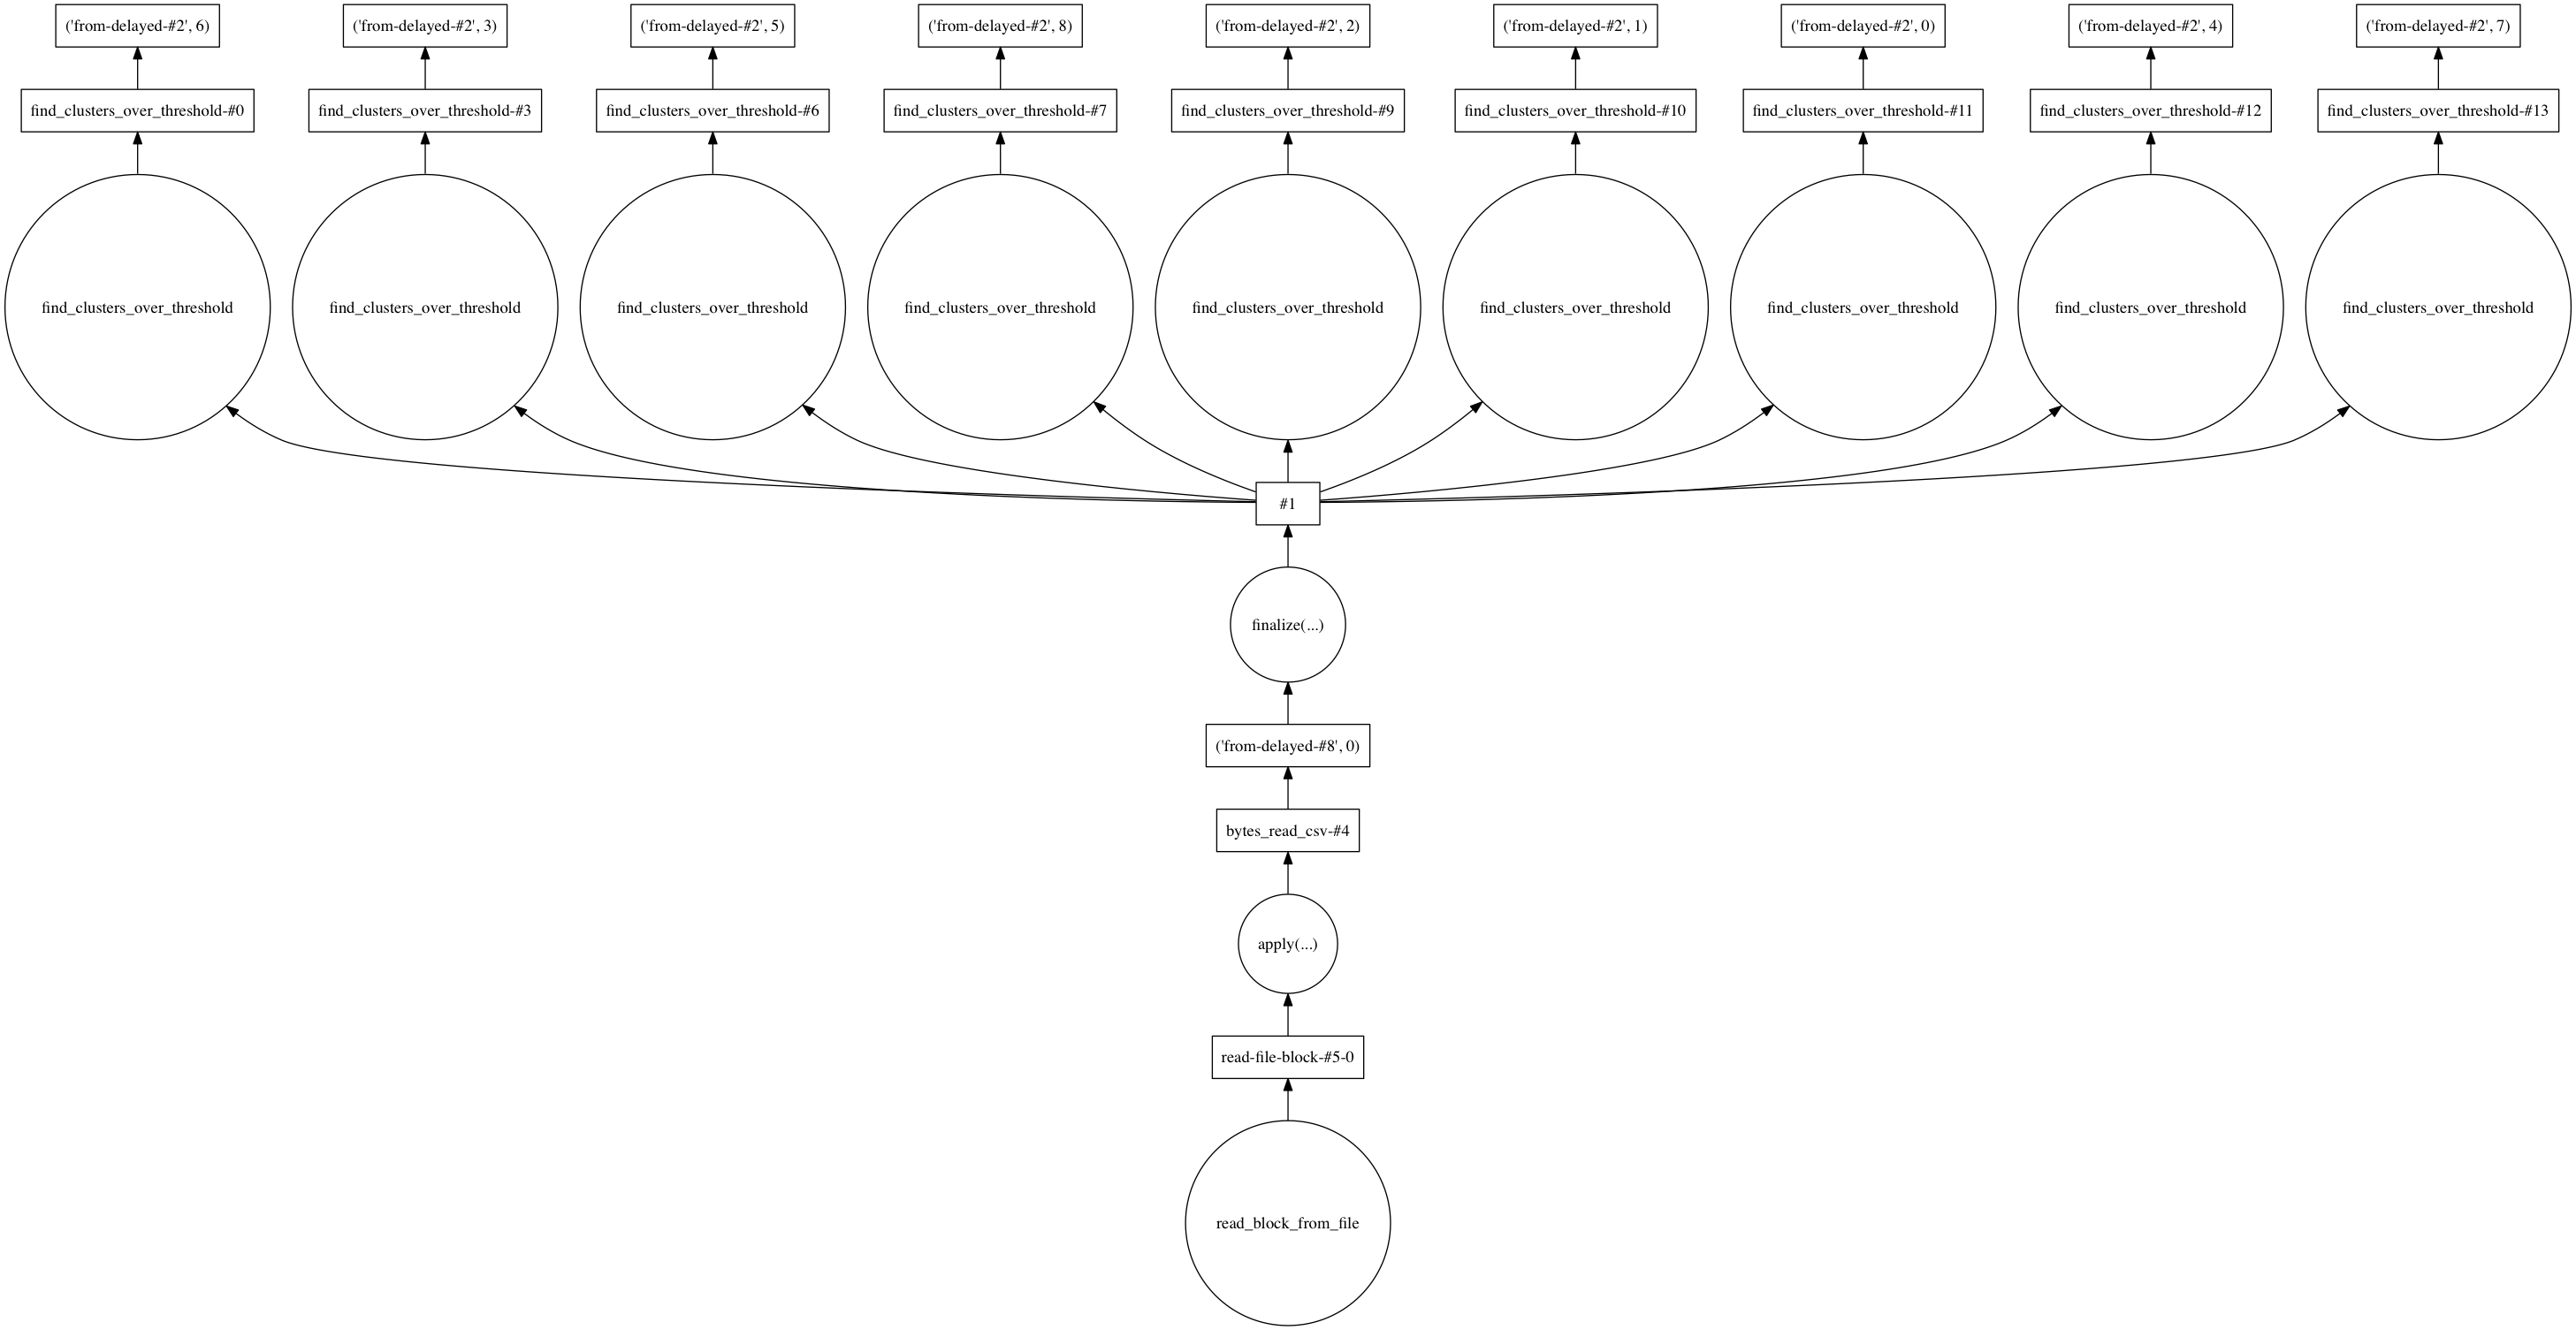

In [3]:

clusters.visualize()

In [46]:
b = clusters.to_frame()

In [2]:
c = dd.concat(clusters).to_frame()
c.head()

,Count
0,Set k threshold 0 {music...
1,"Empty DataFrame Columns: [Set, k, threshold] I..."
2,"Set k threshold 0 {ار, ء, ن..."
3,"Set k threshold 0 {ار, ء, ن..."
4,"Empty DataFrame Columns: [Set, k, threshold] I..."


In [24]:
con = dd.concat(clusters.to_delayed())

In [25]:
res = con.compute()

In [32]:
a = dd.concat(res)

In [37]:
dd.from_delayed(clusters.to_delayed()).head()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd8 in position 149: ordinal not in range(128)

In [23]:
clusters.to_delayed()

AttributeError: 'list' object has no attribute 'compute'

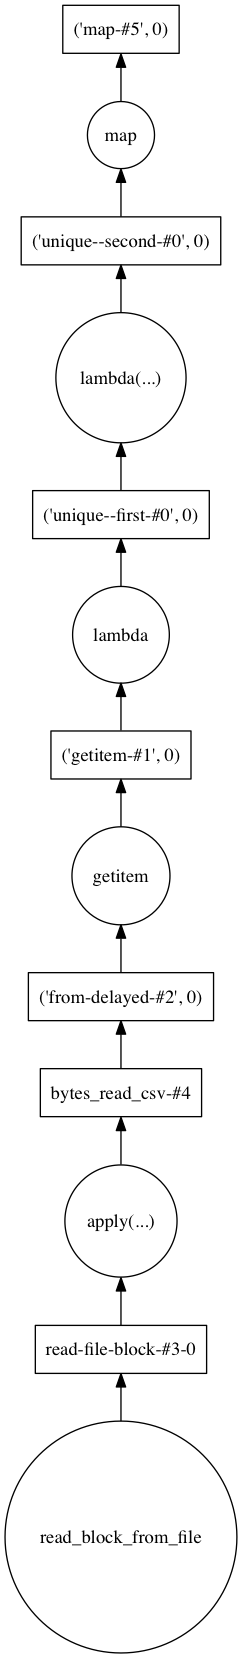

In [8]:
con.visualize()